In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#some extra libaries

In [ ]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import PIL
import os

In [ ]:
#load the dataset andb set the path

In [ ]:
folder_path ="/content/drive/My Drive/project/dataset"


In [ ]:
# import the neccesary libaries and set the path

In [ ]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm

folder_path = "/content/drive/My Drive/project/dataset"
glaucoma = Path(folder_path + '/glaucoma')
cataract = Path(folder_path + '/cataract')
normal = Path(folder_path + '/normal')
diabetic_retinopathy = Path(folder_path + '/diabetic_retinopathy')

disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
df = pd.DataFrame()



In [ ]:
for types in disease_type:
    if types.exists():  # Check if the directory exists
        for imagepath in tqdm(list(types.iterdir()), desc=str(types)):
            df = pd.concat([df, pd.DataFrame({
                'image': [str(imagepath)],
                'disease_type': [disease_type.index(types)]
            })], ignore_index=True)


/content/drive/My Drive/project/dataset/normal: 100%|██████████| 1075/1075 [00:00<00:00, 1801.46it/s]
/content/drive/My Drive/project/dataset/diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 1772.46it/s]


In [ ]:
df

,image,disease_type
0,/content/drive/My Drive/project/dataset/glauco...,0
1,/content/drive/My Drive/project/dataset/glauco...,0
2,/content/drive/My Drive/project/dataset/glauco...,0
3,/content/drive/My Drive/project/dataset/glauco...,0
4,/content/drive/My Drive/project/dataset/glauco...,0
...,...,...
4213,/content/drive/My Drive/project/dataset/diabet...,3
4214,/content/drive/My Drive/project/dataset/diabet...,3
4215,/content/drive/My Drive/project/dataset/diabet...,3
4216,/content/drive/My Drive/project/dataset/diabet...,3


In [ ]:
#inspect the data

In [ ]:
df.head()

,image,disease_type
0,/content/drive/My Drive/project/dataset/glauco...,0
1,/content/drive/My Drive/project/dataset/glauco...,0
2,/content/drive/My Drive/project/dataset/glauco...,0
3,/content/drive/My Drive/project/dataset/glauco...,0
4,/content/drive/My Drive/project/dataset/glauco...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         4218 non-null   object
 1   disease_type  4218 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.0+ KB


In [ ]:
df.describe()

,disease_type
count,4218.000000
mean,1.536747
std,1.116713
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
df.shape

(4218, 2)

In [ ]:
df.columns

Index(['image', 'disease_type'], dtype='object')

In [ ]:
df.count() # number of rows

,0
image,4218
disease_type,4218


In [ ]:
df.disease_type.value_counts()

,count
disease_type,
3,1098
2,1075
1,1038
0,1007


In [ ]:
# check if null  values present are not.

In [ ]:
df.isnull().sum()

,0
image,0
disease_type,0


In [ ]:
#viusilize images in dataset

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
def plot_image(n, num_samples=3):
    diseases_lables = ['glaucoma','cataract', ' normal ',  ' diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']
    plt.figure(figsize=(15,6))

    for i, path in enumerate(images, 1):
      img= (plt.imread(path)- path.imread(path).min())/plt.imread(path).max()
      plt.subplot(3,3,i)
      plt.imshow(img)
      plt.axis('off')
      plt.title(diseases_lables[n])
      plt.show()

In [ ]:
import seaborn as sns # visualization
import cv2
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import PIL
import os

In [ ]:
import matplotlib.pyplot as plt

def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']
    plt.figure(figsize=(15, 6))

    for i, path in enumerate(images, 1):
        # Load the image using plt.imread
        img = plt.imread(path)

        # Normalize the image
        img = (img - img.min()) / img.max()

        # Plot the image
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()




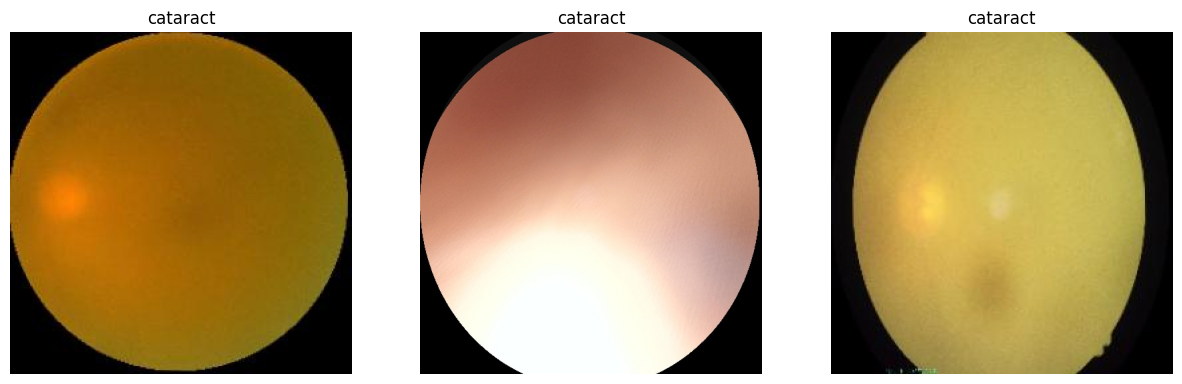

In [ ]:
plot_image(n=1, num_samples=3)

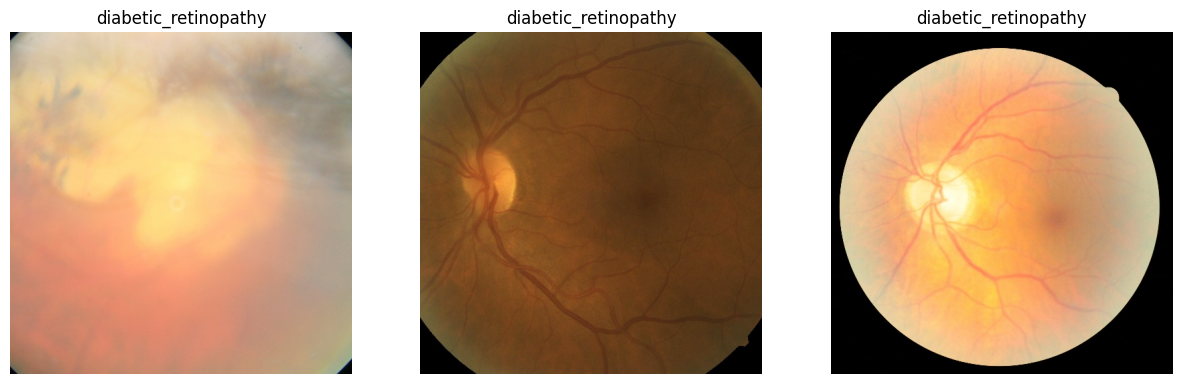

In [ ]:
plot_image(3)

In [ ]:
df.tail()

,image,disease_type
4213,/content/drive/My Drive/project/dataset/diabet...,3
4214,/content/drive/My Drive/project/dataset/diabet...,3
4215,/content/drive/My Drive/project/dataset/diabet...,3
4216,/content/drive/My Drive/project/dataset/diabet...,3
4217,/content/drive/My Drive/project/dataset/diabet...,3


In [ ]:
#show some samples:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import cv2
import glob
import albumentations as A
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.applications import EfficientNetB3,InceptionResNetV2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers,regularizers
from tensorflow.keras import callbacks

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_image_sample(df):
    file_column = 'image'  # Column with file paths
    label_column = 'disease_type'  # Column with labels

    random_data = df.sample(n=16)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                             subplot_kw={'xticks': [], 'yticks': []})
    plt.suptitle('Samples of eye diseases!', y=1.05, fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(random_data.iloc[i][file_column]))
        ax.set_title(random_data.iloc[i][label_column])

    plt.tight_layout()
    plt.show()


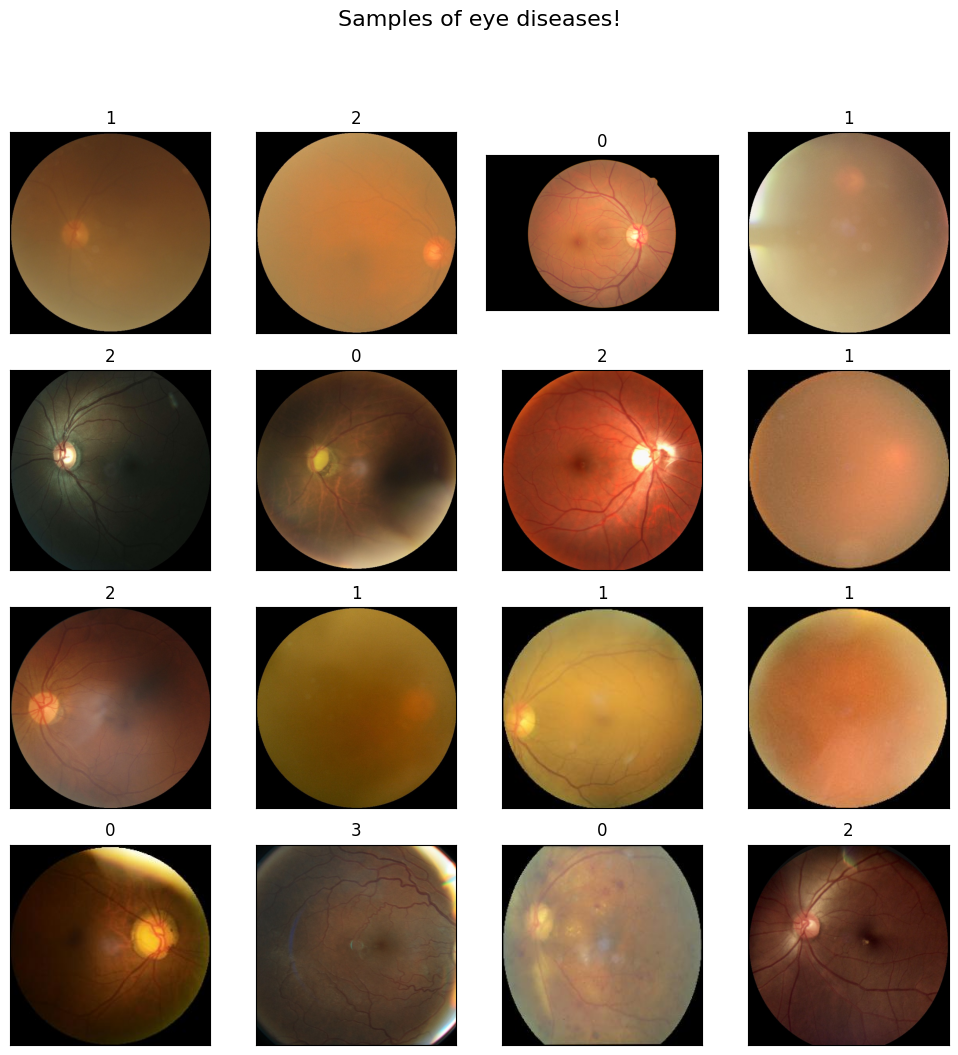

In [ ]:
show_image_sample(df)

In [ ]:
## check for duplicates
df.duplicated().sum()

0

In [ ]:
# data agumentation

In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

def augment_image(image):
    aug = A.Compose([
        A.Flip(),
        A.Rotate(limit=75, always_apply=True),
    ])
    augmented_image = aug(image=image)['image']
    return augmented_image

def show_original_augment_image(df):
    file_column = 'image'

    random_data = df.sample(n=3)

    for i in range(len(random_data)):
        # Read the original image
        image = cv2.imread(random_data.iloc[i][file_column])


        augmented_image = augment_image(image)


        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Original Image")

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Augmented Image")

        plt.show()

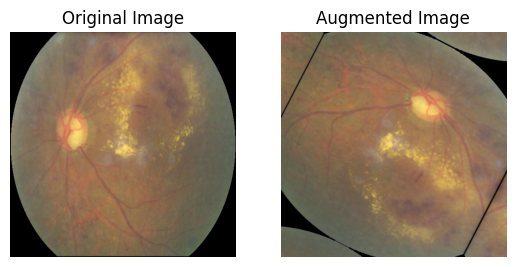

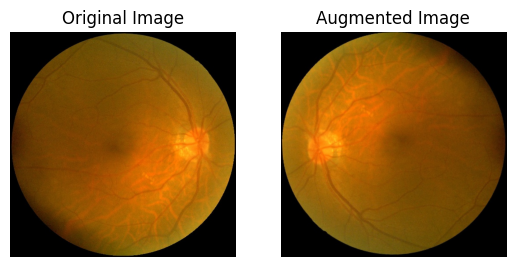

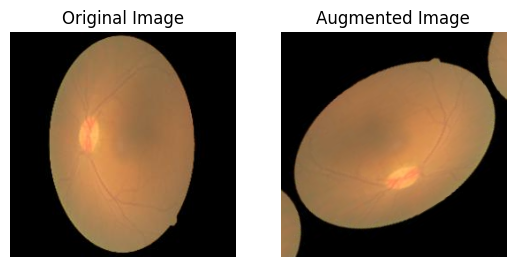

In [ ]:
show_original_augment_image(df)

In [ ]:
df['disease_type']=df['disease_type'].map({0: 'glaucoma', 1:'cataract' , 2: 'normal', 3: 'diabetic_retinopathy' })

In [ ]:
df.disease_type.value_counts()

,count
disease_type,
diabetic_retinopathy,1098
normal,1075
cataract,1038
glaucoma,1007


In [ ]:
# set target and feature values from dataset

In [ ]:
#Feature selection

In [ ]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
#train-test data

In [ ]:
from sklearn.model_selection import train_test_split

# Split your data into features (X) and labels (y)
x = df['image']  # 'image' contains image data
y = df['disease_type']  # 'disease_type' contains labels

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x

,image
0,/content/drive/My Drive/project/dataset/glauco...
1,/content/drive/My Drive/project/dataset/glauco...
2,/content/drive/My Drive/project/dataset/glauco...
3,/content/drive/My Drive/project/dataset/glauco...
4,/content/drive/My Drive/project/dataset/glauco...
...,...
4213,/content/drive/My Drive/project/dataset/diabet...
4214,/content/drive/My Drive/project/dataset/diabet...
4215,/content/drive/My Drive/project/dataset/diabet...
4216,/content/drive/My Drive/project/dataset/diabet...


In [ ]:
y

,disease_type
0,glaucoma
1,glaucoma
2,glaucoma
3,glaucoma
4,glaucoma
...,...
4213,diabetic_retinopathy
4214,diabetic_retinopathy
4215,diabetic_retinopathy
4216,diabetic_retinopathy


In [ ]:
#data augmentation using the ImageDataGenerator

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [ ]:
datagen

In [ ]:
#data generators for tarining

In [ ]:
# Convert the 'disease_type' column to string
df['disease_type'] = df['disease_type'].astype(str)


train_data = datagen.flow_from_dataframe(dataframe=df,
                                         x_col='image',
                                         y_col='disease_type',
                                         target_size=(224, 224),
                                         class_mode='categorical',
                                         batch_size=32,
                                         shuffle=True,
                                         subset='training')




Found 3375 validated image filenames belonging to 4 classes.


In [ ]:
# Data generators for validation

In [ ]:
df['disease_type'] = df['disease_type'].astype(str)

valid_data = datagen.flow_from_dataframe(dataframe=df,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'validation')

Found 843 validated image filenames belonging to 4 classes.


In [ ]:
#BUILDING THE  MODEL

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, RandomContrast, RandomRotation, RandomZoom, RandomFlip
from keras.models import Sequential

In [ ]:
# labeling this

In [ ]:
labels= [key for key in train_data.class_indices ]
num_classes= len(disease_type)

In [ ]:
# 1st approach

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
image_size=224
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 2nd approach

In [ ]:
from tensorflow.keras.applications import ResNet50

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

ValueError: Undefined shapes are not supported.

In [ ]:
# 3rd model tecnique

In [ ]:
from tensorflow.keras.applications import InceptionV3

inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# 4th approach

In [ ]:
from tensorflow.keras.applications import MobileNetV2

mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 5th approach

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# model summarization

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


model= Sequential()
model.add(vgg)
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(256,activation= 'relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(4,activation='softmax'))



In [ ]:
model = tf.keras.Sequential([
    # Input layer, assuming input images of size 224x224x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Additional layers
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])



In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_97 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,908 (91.20 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# data ploting using keras modeling techniques

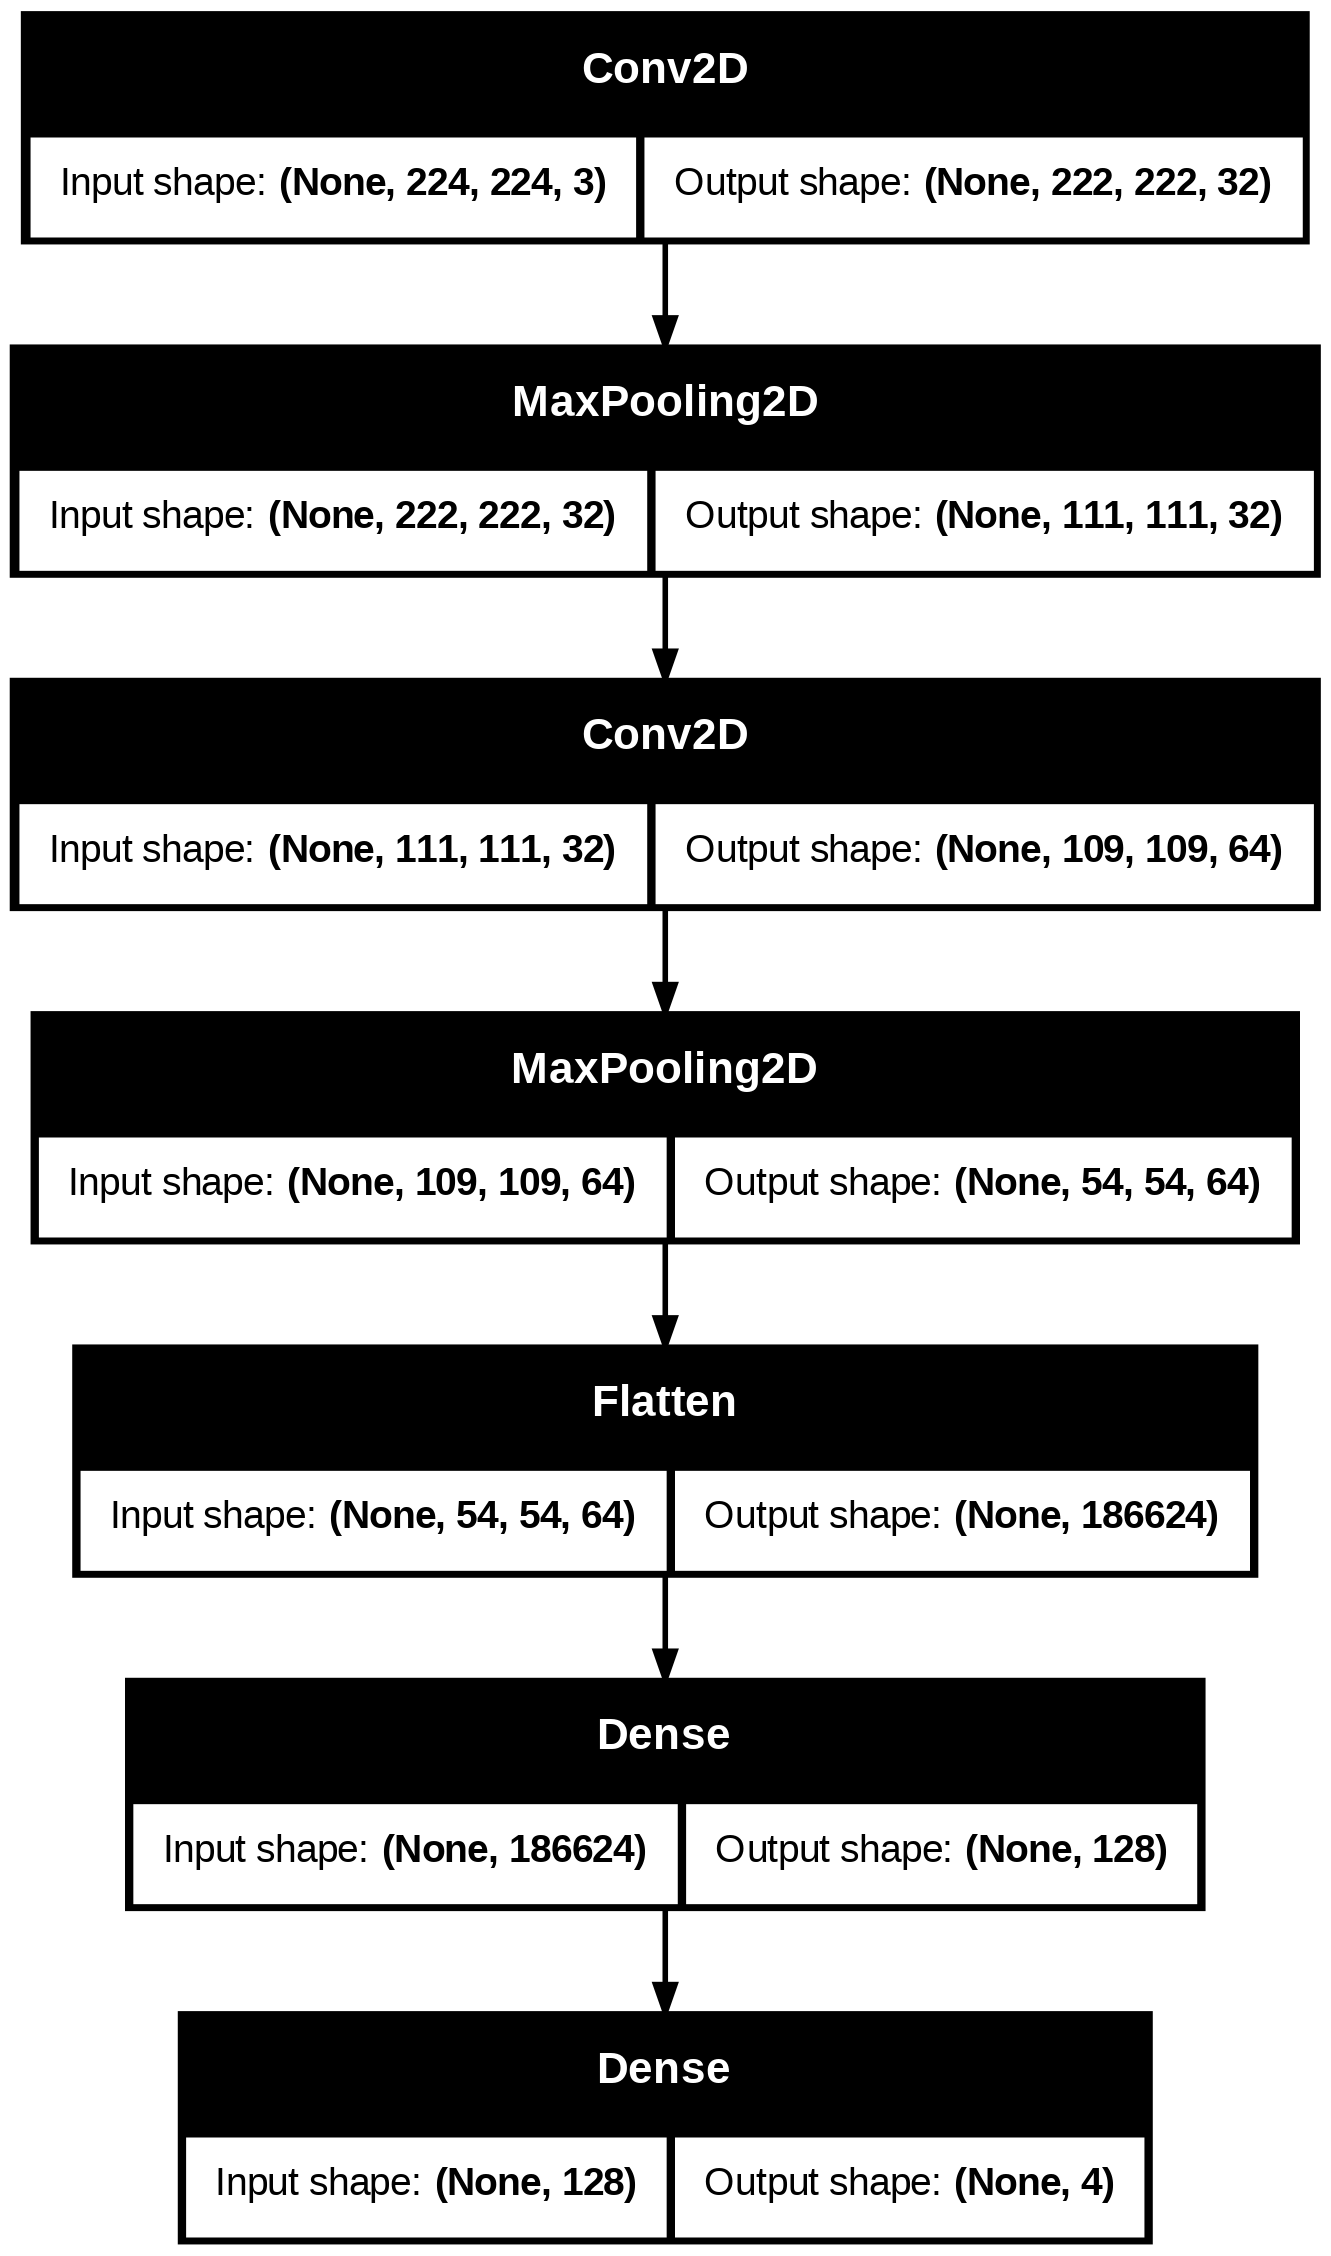

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True,
                          expand_nested=True)

In [ ]:
# check the checkpoint technique in the model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint with updated file extension
checkpoint = ModelCheckpoint("vgg19.keras",  # Change .h5 to .keras
                             monitor="val_acc",
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             save_freq='epoch')

# EarlyStopping callback
earlystop = EarlyStopping(monitor="val_acc",
                          patience=5,
                          verbose=1)




In [ ]:
his = model.fit(
    train_data,       # Training data
    batch_size=32,    # Batch size for training
    epochs=20,        # Number of training epochs
    validation_data=valid_data,  # Validation data
    verbose=1,        # Verbosity level for training logs
    callbacks=[checkpoint, earlystop]  # Callback functions
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/106 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6183 - loss: 1.6293 

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


ValueError: EarlyStopping callback received monitor=val_acc but Keras isn't able to automatically determine whether that metric should be maximized or minimized. Pass `mode='max'` in order to do early stopping based on the highest metric value, or pass `mode='min'` in order to use the lowest value.

In [ ]:
his = model.fit(
    train_data,
    validation_data=valid_data,
    epochs = 10,
)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 44s 405ms/step - accuracy: 0.8533 - loss: 0.3807 - val_accuracy: 0.0059 - val_loss: 3.1021
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 87s 454ms/step - accuracy: 0.8681 - loss: 0.3389 - val_accuracy: 0.0083 - val_loss: 3.7163
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 379ms/step - accuracy: 0.9014 - loss: 0.2562 - val_accuracy: 0.2064 - val_loss: 1.9938
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 382ms/step - accuracy: 0.9033 - loss: 0.2301 - val_accuracy: 0.0759 - val_loss: 2.9641
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 383ms/step - accuracy: 0.9224 - loss: 0.2037 - val_accuracy: 0.0593 - val_loss: 4.0518
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 383ms/step - accuracy: 0.9280 - loss: 0.1807 - val_accuracy: 0.0925 - val_loss: 3.8272
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 376ms/step - accuracy: 0.9569 - loss: 0.1349 - val_accuracy: 0.3405 - val_loss: 2.7715
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 83s 373ms/step - accuracy: 0.9546 - loss: 0

In [ ]:
# check the model accuracy

In [83]:
loss, accuracy = model.evaluate(valid_data)
print("Loss:", loss)
print("Accuracy:", accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 967ms/step - accuracy: 0.2228 - loss: 4.1408
Loss: 4.071843147277832
Accuracy: 0.22657176852226257


In [84]:
#model evalution

In [85]:
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 481ms/step


In [87]:
# model  evalution and validation in the from of visuilization of the model

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


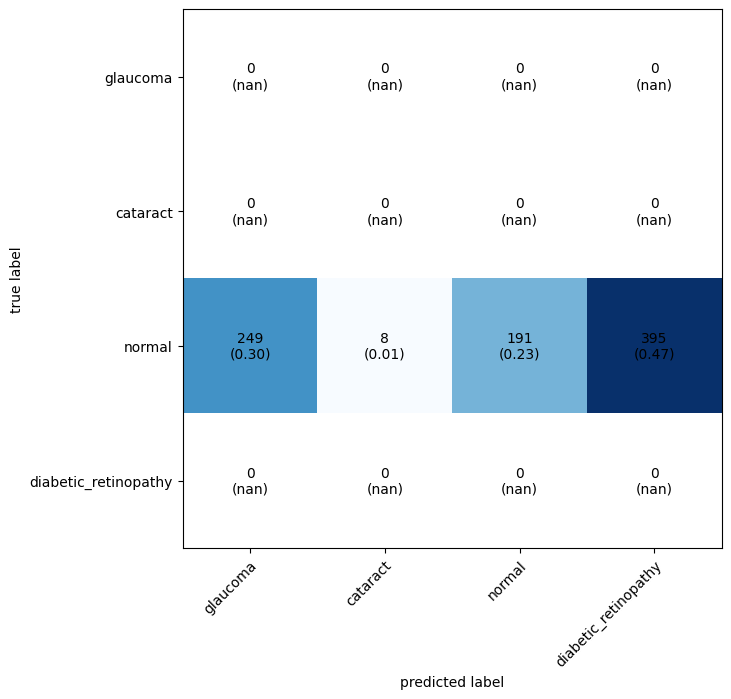

In [90]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["glaucoma", "cataract", "normal", "diabetic_retinopathy"],
                      show_normed = True);
plt.savefig("Predected & True Label.png")

In [88]:
# check classification_report of the model

In [89]:
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.00      0.00      0.00         0
diabetic_retinopathy       0.00      0.00      0.00         0
            glaucoma       1.00      0.23      0.37       843
              normal       0.00      0.00      0.00         0

            accuracy                           0.23       843
           macro avg       0.25      0.06      0.09       843
        weighted avg       1.00      0.23      0.37       843



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-91-2f26dee22fd1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['disease_type'].value_counts().index, y=df['disease_type'].value_counts().values, palette="Set2")


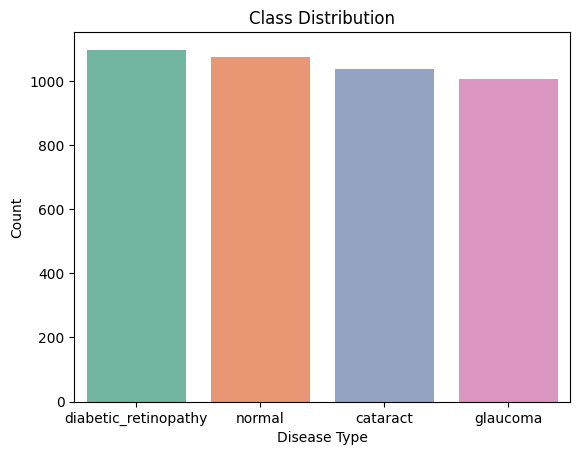

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'image' and 'disease_type' columns
sns.barplot(x=df['disease_type'].value_counts().index, y=df['disease_type'].value_counts().values, palette="Set2")

plt.title("Class Distribution")
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.show()


In [92]:
# check training of the model using another method

In [93]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [94]:
# fine tuning with grid search
from sklearn.model_selection import GridSearchCV

g=np.arange(1e-4,1e-1,0.0001)
g=g.tolist()
parameters = {"kernel": ("sigmoid", "rbf", "poly", "linear"),
              "C": [1, 10, 0.1],
             "gamma": g}
method = svm.SVC()
grid_search = GridSearchCV(method, parameters)
grid_search.fit(x_train, y_train)

ValueError: 
All the 59940 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11988 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '/content/drive/My Drive/project/dataset/cataract/_213_1709362.jpg'

--------------------------------------------------------------------------------
47952 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: '/content/drive/My Drive/project/dataset/glaucoma/_318_5873639.jpg'


In [95]:
print(f"grid score:{grid_search.score}")


grid score:<bound method BaseSearchCV.score of GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 0.1],
                         'gamma': [0.0001, 0.0002, 0.00030000000000000003,
                                   0.0004, 0.0005, 0.0006000000000000001,
                                   0.0007000000000000001, 0.0008,
                                   0.0009000000000000001, 0.001, 0.0011,
                                   0.0012000000000000001, 0.0013000000000000002,
                                   0.0014000000000000002, 0.0015, 0.0016,
                                   0.0017000000000000001, 0.0018000000000000002,
                                   0.0019000000000000002, 0.002, 0.0021, 0.0022,
                                   0.0023, 0.0024, 0.0025, 0.0026, 0.0027,
                                   0.0028, 0.0029, 0.003, ...],
                         'kernel': ('sigmoid', 'rbf', 'poly', 'linear')})>


In [ ]:
# ploting tecniques using this model

In [96]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=5,
                    callbacks=[early_stopping])

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 44s 396ms/step - accuracy: 0.9683 - loss: 0.0875 - val_accuracy: 0.3369 - val_loss: 3.3410
Epoch 2/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 80s 382ms/step - accuracy: 0.9673 - loss: 0.0936 - val_accuracy: 0.2586 - val_loss: 3.5558
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 376ms/step - accuracy: 0.9800 - loss: 0.0648 - val_accuracy: 0.2823 - val_loss: 4.0701
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 379ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.2598 - val_loss: 4.4203
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 82s 371ms/step - accuracy: 0.9747 - loss: 0.0715 - val_accuracy: 0.2301 - val_loss: 5.0716


In [97]:
# check how history can signifies this model

In [98]:
import matplotlib.pyplot as plt

def plot_training(history):
    # Check if the history object contains accuracy and loss data
    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        # Plot accuracy
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')

    if 'loss' in history.history and 'val_loss' in history.history:
        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


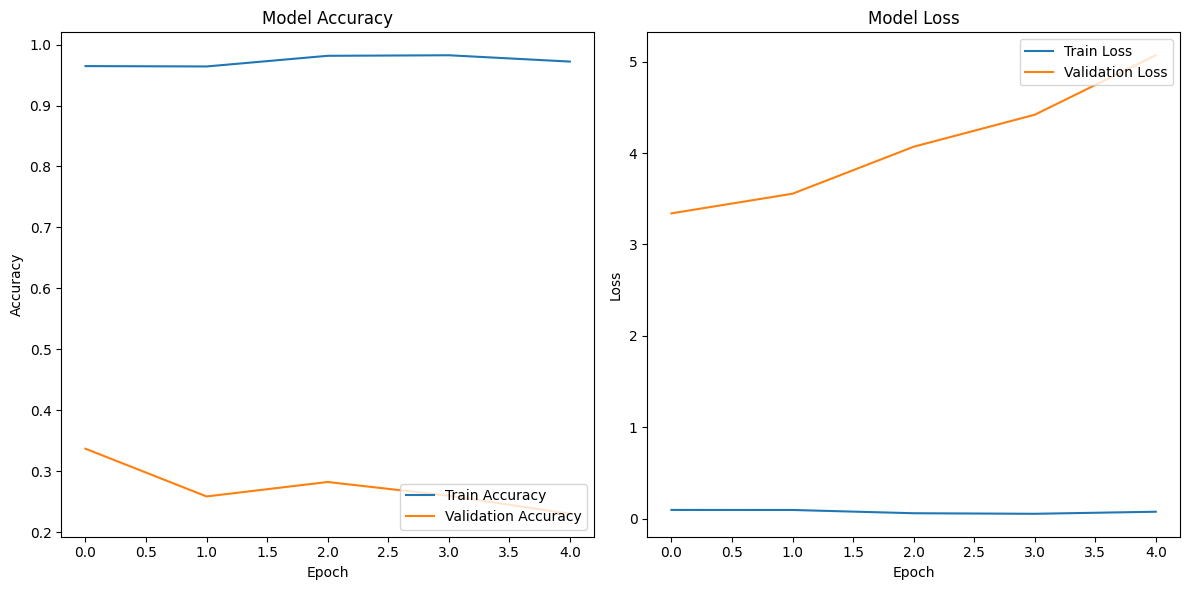

In [99]:
plot_training(history)

In [ ]:
#

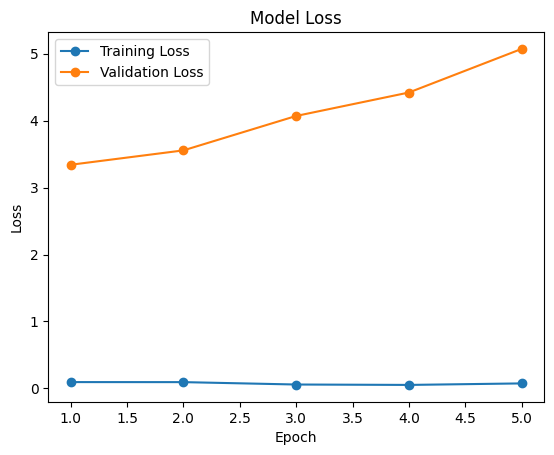

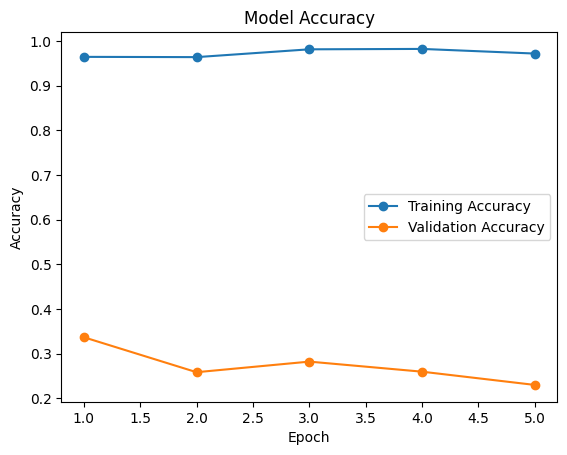

In [100]:
# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

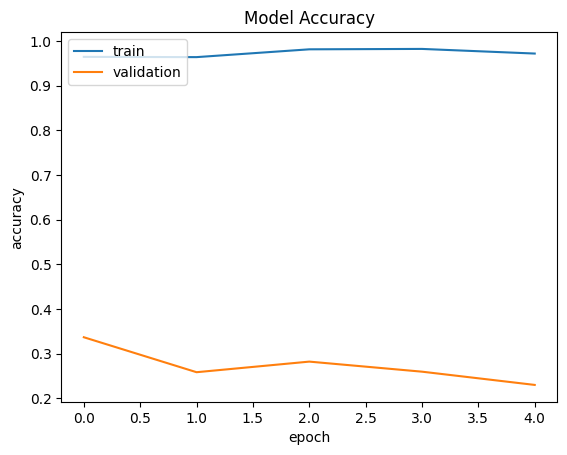

In [101]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# plot with help of hist data

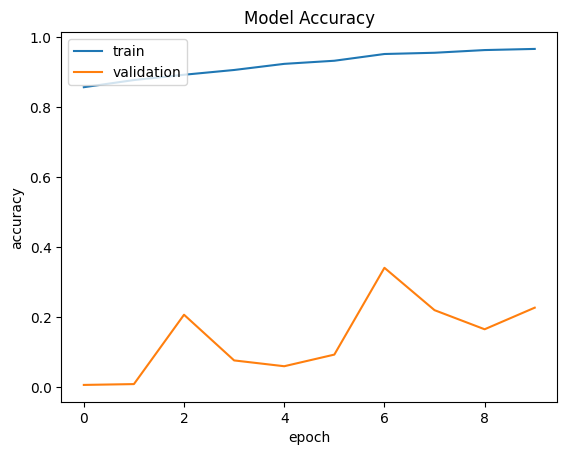

In [102]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# some extra plotting techniques to show by the uses of visualization process

In [ ]:
# sactter plot

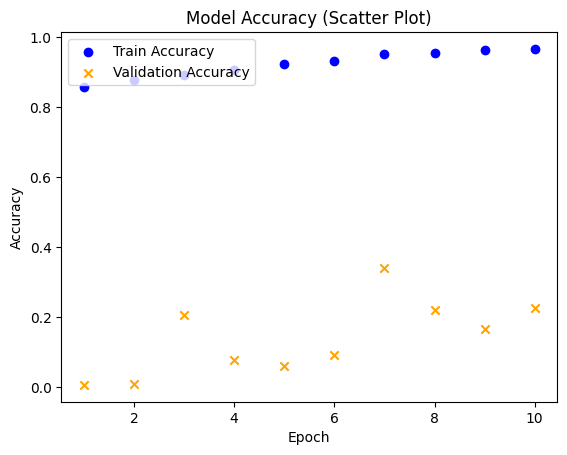

In [103]:
import matplotlib.pyplot as plt

epochs = range(1, len(his.history['accuracy']) + 1)

plt.scatter(epochs, his.history['accuracy'], label='Train Accuracy', color='blue', marker='o')
plt.scatter(epochs, his.history['val_accuracy'], label='Validation Accuracy', color='orange', marker='x')
plt.title('Model Accuracy (Scatter Plot)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# bar plot

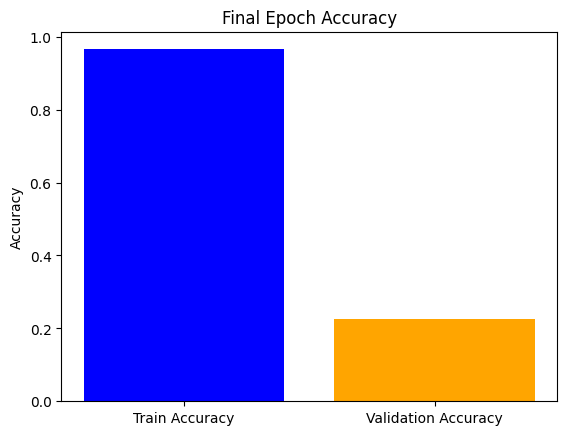

In [104]:
import numpy as np

# Assuming you want to plot accuracy at the last epoch
train_acc = his.history['accuracy'][-1]
val_acc = his.history['val_accuracy'][-1]

accuracy_data = {'Train Accuracy': train_acc, 'Validation Accuracy': val_acc}
names = list(accuracy_data.keys())
values = list(accuracy_data.values())

plt.bar(names, values, color=['blue', 'orange'])
plt.title('Final Epoch Accuracy')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# heatmap

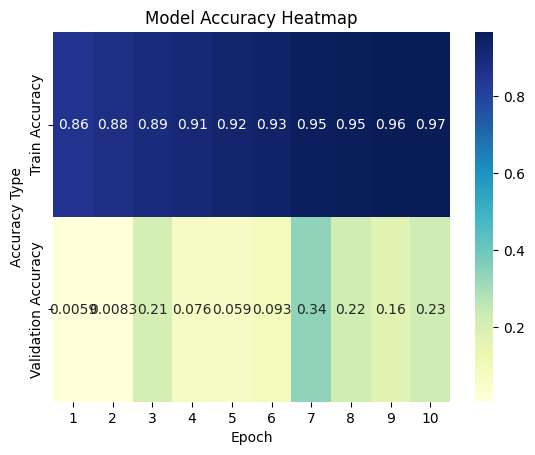

In [105]:
import seaborn as sns

data = {
    'Epoch': list(range(1, len(his.history['accuracy']) + 1)),
    'Train Accuracy': his.history['accuracy'],
    'Validation Accuracy': his.history['val_accuracy']
}

sns.heatmap(pd.DataFrame(data).set_index('Epoch').T, annot=True, cmap='YlGnBu')
plt.title('Model Accuracy Heatmap')
plt.ylabel('Accuracy Type')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# box plot

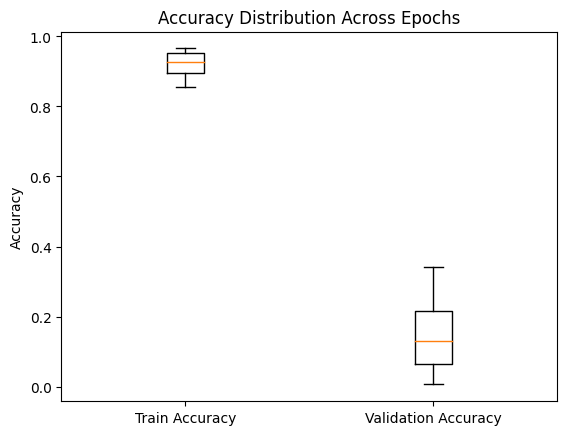

In [106]:
accuracy_data = [
    his.history['accuracy'],
    his.history['val_accuracy']
]

plt.boxplot(accuracy_data, labels=['Train Accuracy', 'Validation Accuracy'])
plt.title('Accuracy Distribution Across Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# precision and recall measure